# Calculate MUR25 Sea Surface Temperature Global Mean

This notebook demonstrates how we calculate the area-weighted global mean sea surface temperature (SST) from the MUR25 L4 dataset. 

You can run this on a local computer by downloading the data using the following command in your terminal:
    
    podaac-data-downloader -c MUR25-JPL-L4-GLOB-v04.2 -d ./data/MUR25-JPL-L4-GLOB-v04.2 --start-date 2022-12-01T00:00:00Z --end-date 2022-12-31T23:00:00Z

### Load required libraries and prepare data

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import date

In [2]:
ds = xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221201090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')
ds


<xarray.Dataset>
Dimensions:           (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2022-12-01T09:00:00
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    analysed_sst      (time, lat, lon) float32 nan nan nan ... 271.4 271.4 271.4
    analysis_error    (time, lat, lon) float32 nan nan nan ... 0.34 0.34 0.34
    mask              (time, lat, lon) float32 2.0 2.0 2.0 2.0 ... 9.0 9.0 9.0
    sea_ice_fraction  (time, lat, lon) float32 nan nan nan ... 0.97 0.97 0.97
    sst_anomaly       (time, lat, lon) float32 nan nan nan nan ... 0.0 0.0 0.0
Attributes: (12/54)
    Conventions:                CF-1.7, ACDD-1.3
    title:                      Daily 0.25-degree MUR SST, Final product
    summary:                    A low-resolution version of the MUR SST analy...
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    ...                         ...
    publisher_name:             GHRSST Project Office
    publisher_url:              https://www.ghrsst.org
    publisher_email:            gpc@ghrsst.org
    file_quality_level:         3
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    acknowledgment:             Please acknowledge the use of these data with...

In [3]:
# select sst variable
sst = ds.analysed_sst

# convert to degrees Celcius
sst = sst - 273.15
sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 720, lon: 1440)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878],
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878],
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-12-01T09:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

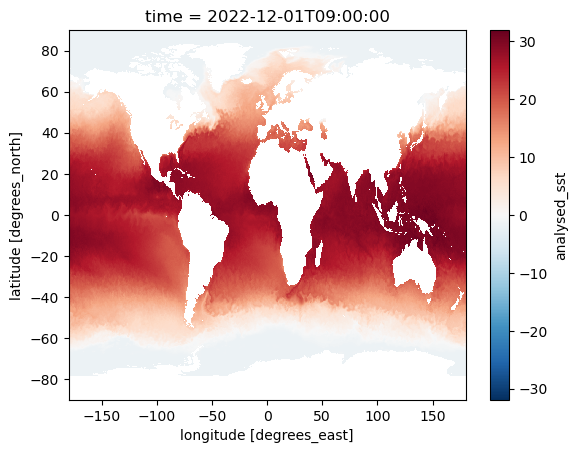

In [4]:
# plot the data
p = sst.plot(subplot_kws=dict(transform=ccrs.PlateCarree()))


### Calculate the area-weighted global mean

In [4]:
# create the weights

weights = np.cos(np.deg2rad(sst.lat))
weights


<xarray.DataArray 'lat' (lat: 720)>
array([0.00218172, 0.00654498, 0.01090811, 0.01527103, 0.01963366,
       0.02399603, 0.02835783, 0.03271909, 0.03707973, 0.04143966,
       0.04579892, 0.05015719, 0.0545145 , 0.05887078, 0.06322594,
       0.06758001, 0.07193268, 0.07628398, 0.08063382, 0.08498225,
       0.08932894, 0.09367393, 0.09801713, 0.10235848, 0.10669798,
       0.11103535, 0.11537059, 0.11970364, 0.12403442, 0.12836295,
       0.13268891, 0.13701235, 0.14133318, 0.14565133, 0.1499668 ,
       0.15427932, 0.1585889 , 0.16289546, 0.16719891, 0.1714993 ,
       0.1757963 , 0.18008997, 0.1843802 , 0.18866692, 0.19295016,
       0.19722962, 0.20150532, 0.20577718, 0.21004525, 0.2143092 ,
       0.21856907, 0.22282477, 0.22707623, 0.2313235 , 0.23556623,
       0.23980448, 0.24403816, 0.24826722, 0.25249165, 0.25671116,
       0.26092577, 0.26513544, 0.26934004, 0.27353963, 0.2777339 ,
       0.28192288, 0.2861065 , 0.29028466, 0.2944574 , 0.29862443,
       0.30278578, 0.30694136, 0.3110911 , 0.31523505, 0.31937286,
       0.3235046 , 0.32763016, 0.33174962, 0.33586264, 0.33996928,
       0.34406942, 0.34816304, 0.35225013, 0.3563304 , 0.36040387,
       0.3644705 , 0.36853018, 0.37258297, 0.37662855, 0.38066694,
       0.38469812, 0.38872194, 0.3927385 , 0.39674744, 0.40074885,
       0.40474263, 0.4087287 , 0.4127071 , 0.4166775 , 0.42064002,
...
       0.40074885, 0.39674744, 0.3927385 , 0.38872194, 0.38469812,
       0.38066694, 0.37662855, 0.37258297, 0.36853018, 0.3644705 ,
       0.36040387, 0.3563304 , 0.35225013, 0.34816304, 0.34406942,
       0.33996928, 0.33586264, 0.33174962, 0.32763016, 0.3235046 ,
       0.31937286, 0.31523505, 0.3110911 , 0.30694136, 0.30278578,
       0.29862443, 0.2944574 , 0.29028466, 0.2861065 , 0.28192288,
       0.2777339 , 0.27353963, 0.26934004, 0.26513544, 0.26092577,
       0.25671116, 0.25249165, 0.24826722, 0.24403816, 0.23980448,
       0.23556623, 0.2313235 , 0.22707623, 0.22282477, 0.21856907,
       0.2143092 , 0.21004525, 0.20577718, 0.20150532, 0.19722962,
       0.19295016, 0.18866692, 0.1843802 , 0.18008997, 0.1757963 ,
       0.1714993 , 0.16719891, 0.16289546, 0.1585889 , 0.15427932,
       0.1499668 , 0.14565133, 0.14133318, 0.13701235, 0.13268891,
       0.12836295, 0.12403442, 0.11970364, 0.11537059, 0.11103535,
       0.10669798, 0.10235848, 0.09801713, 0.09367393, 0.08932894,
       0.08498225, 0.08063382, 0.07628398, 0.07193268, 0.06758001,
       0.06322594, 0.05887078, 0.0545145 , 0.05015719, 0.04579892,
       0.04143966, 0.03707973, 0.03271909, 0.02835783, 0.02399603,
       0.01963366, 0.01527103, 0.01090811, 0.00654498, 0.00218172],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    long_name:              latitude
    standard_name:          latitude
    coverage_content_type:  coordinate
    axis:                   Y
    units:                  degrees_north
    valid_min:              -90.0
    valid_max:              90.0
    comment:                geolocations inherited from the input data withou...

In [5]:
for lat in sst.lat:
    l = lat.values
    if (l>60) or (l<-60):
        weights.loc[dict(lat=l)] = 0

#weights

In [6]:
# apply weights to data
sst_weighted = sst.weighted(weights)

# calculate the global mean on the weighted data
sst_global_mean = sst_weighted.mean()

# display the values
sst_global_mean

<xarray.DataArray 'analysed_sst' ()>
array(20.52885965)

In [7]:

sst_out = sst_global_mean.expand_dims(time=ds.time)
sst_out = sst_out.assign_attrs({
    "description": "Area-weighted global mean sea surface temperature calculated using AWS Lambda",
    "units": "celcius",
    "date_created": date.today().strftime("%b-%d-%Y")
})
sst_out

<xarray.DataArray 'analysed_sst' (time: 1)>
array([20.52885965])
Coordinates:
  * time     (time) datetime64[ns] 2022-12-01T09:00:00
Attributes:
    description:   Area-weighted global mean sea surface temperature calculat...
    units:         celcius
    date_created:  Jun-09-2023